# Numerically Controlled Oscillator (NCO)
A NCO generates sine waves in digital systems. It's main blocks are a phase accumulator and a phase-to-amplitude (PAC) converter, usually a look up table.

## Phase accumulator
Every clock cycle, the phase accumulator calculates the phase of the generated sine wave.\
If the phase accumulator is $H$ bits wide, then the phase wraps up at $2^H$ (360 degrees or $2\pi$ radians), and the phase step, or Frequency Control World (FWC), at each clock cycle is (notice it is an integer):
$$
FCW = \lfloor \frac{f_{out}}{f_{clk}} 2^{H} \rfloor = \lfloor \frac{num}{den} 2^{H} \rfloor
$$

Where $\frac{num}{den}$ is the simplified relationship of the frequencies. For instance, if $f_{clk}=100$, $f_{out}=12.5$ and $H=5$, then:
$$
FCW = \lfloor \frac{f_{out}}{f_{clk}} 2^{H} \rfloor = \lfloor \frac{12.5}{100} 2^{5} \rfloor = \lfloor \frac{1}{8} 2^{5} \rfloor = \lfloor 4 \rfloor = 4
$$

In [1]:
from theory_utils import NCO_simple

# Parameters
f_clk = 100
f_out = 12.5
W = 5
num_samples = 50

simple_NCO = NCO_simple(f_clk, f_out, W, num_samples)
simple_NCO

NCO_simple:
  W=5
  num=1
  den=8
  FWC=4

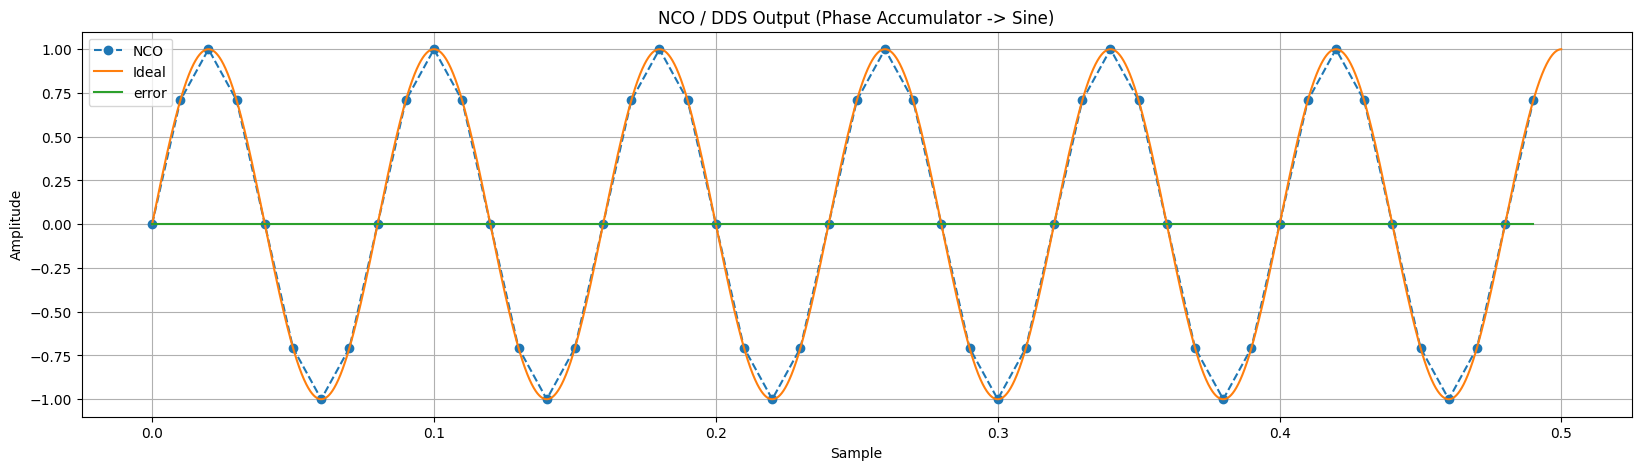

In [2]:
simple_NCO.plot()

The NCO generates a perfect sine wave at the desired $f_{out}$ because the simplified fraction $\frac{f_{out}}{f_{clk}}=\frac{1}{8}$ has a power of two in the denominator. However, if this is not the case, the generated sine wave will have an error, becasue $FCM$ won't be an integer and the decimal part will be lost. 

For instance, if $f_{out}=12.0$:

$$
FCW = \lfloor \frac{f_{out}}{f_{clk}} 2^{H} \rfloor = \lfloor \frac{12.0}{100} 2^{5} \rfloor = \lfloor \frac{3}{25} 2^{5} \rfloor = \lfloor 3.84 \rfloor = 3
$$

The actual frequency the NOC is generating is:

$$
f_{out} = \frac{FCW \cdot f_{clk}}{2^{H}} = \frac{3 \cdot 100}{2^{5}} = 9.375
$$


In [3]:
# Parameters
f_clk = 100
f_out = 12.0
W = 5
num_samples = 50

simple_NCO = NCO_simple(f_clk, f_out, W, num_samples)
simple_NCO

NCO_simple:
  W=5
  num=3
  den=25
  FWC=3

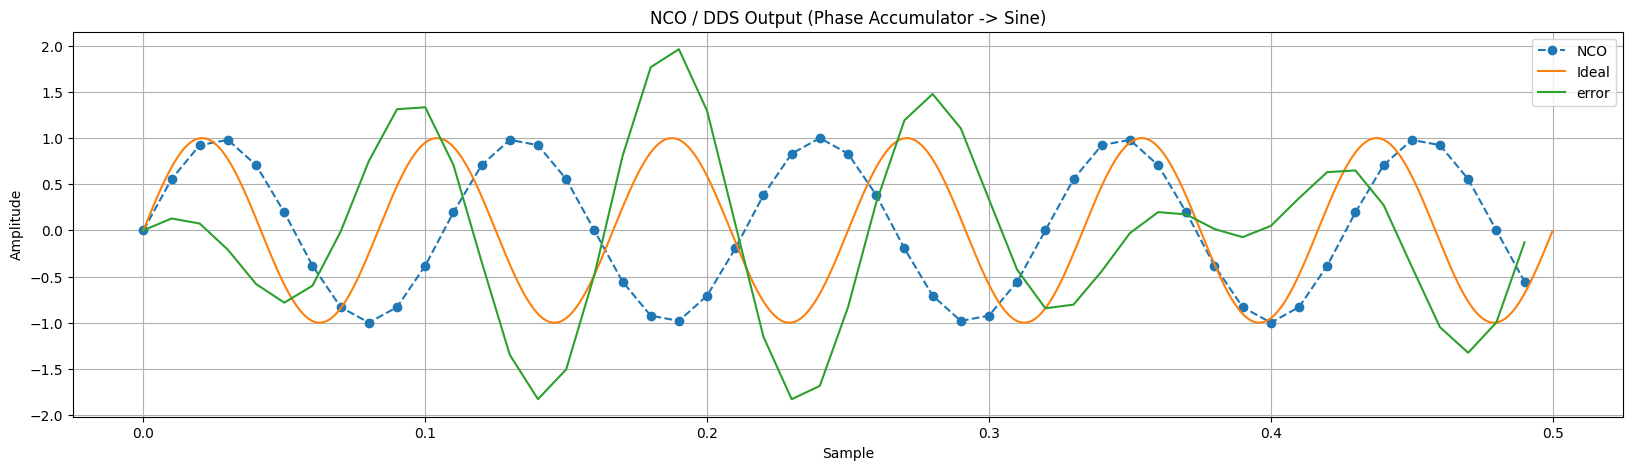

In [4]:
simple_NCO.plot()

To overcome this issue, the reminder of $FCW$ is accumulated in a second accumulator L bits wide. For the second accumulator, $2^L$ represents

$$
m = \lfloor \frac{2^L}{den} \rfloor
$$

and the phase step for the second accumulator, phase step low, is:

$$
psl = \lfloor rem \cdot m \rfloor
$$

Where

$$
rem = (2^H \cdot num) \bmod den
$$

There is still a reminder for the second accumulator

$$
modulo = 2^L \bmod den
$$

that is added to the second accumulator everytime it overflows

In [5]:
from theory_utils import NCO_complex

# Parameters
L = 5
complex_NCO = NCO_complex(f_clk, f_out, W, num_samples, L)
complex_NCO

phase_acc_low = 21, carry = 0, offset = 0, pase_acc = 3
phase_acc_low = 10, carry = 1.0, offset = 7, pase_acc = 7.0
phase_acc_low = 6, carry = 1.0, offset = 7, pase_acc = 11.0
phase_acc_low = 2, carry = 1.0, offset = 7, pase_acc = 15.0
phase_acc_low = 30, carry = 0, offset = 0, pase_acc = 18.0
phase_acc_low = 19, carry = 1.0, offset = 7, pase_acc = 22.0
phase_acc_low = 15, carry = 1.0, offset = 7, pase_acc = 26.0
phase_acc_low = 11, carry = 1.0, offset = 7, pase_acc = 30.0
phase_acc_low = 7, carry = 1.0, offset = 7, pase_acc = 2.0
phase_acc_low = 3, carry = 1.0, offset = 7, pase_acc = 6.0
phase_acc_low = 31, carry = 0, offset = 0, pase_acc = 9.0
phase_acc_low = 20, carry = 1.0, offset = 7, pase_acc = 13.0
phase_acc_low = 16, carry = 1.0, offset = 7, pase_acc = 17.0
phase_acc_low = 12, carry = 1.0, offset = 7, pase_acc = 21.0
phase_acc_low = 8, carry = 1.0, offset = 7, pase_acc = 25.0
phase_acc_low = 4, carry = 1.0, offset = 7, pase_acc = 29.0
phase_acc_low = 0, carry = 1.0, offset = 7,

NCO_complex:
  W=5
  num=3
  den=25
  FWC=3
  L=5
  psl=21
  modulo=7

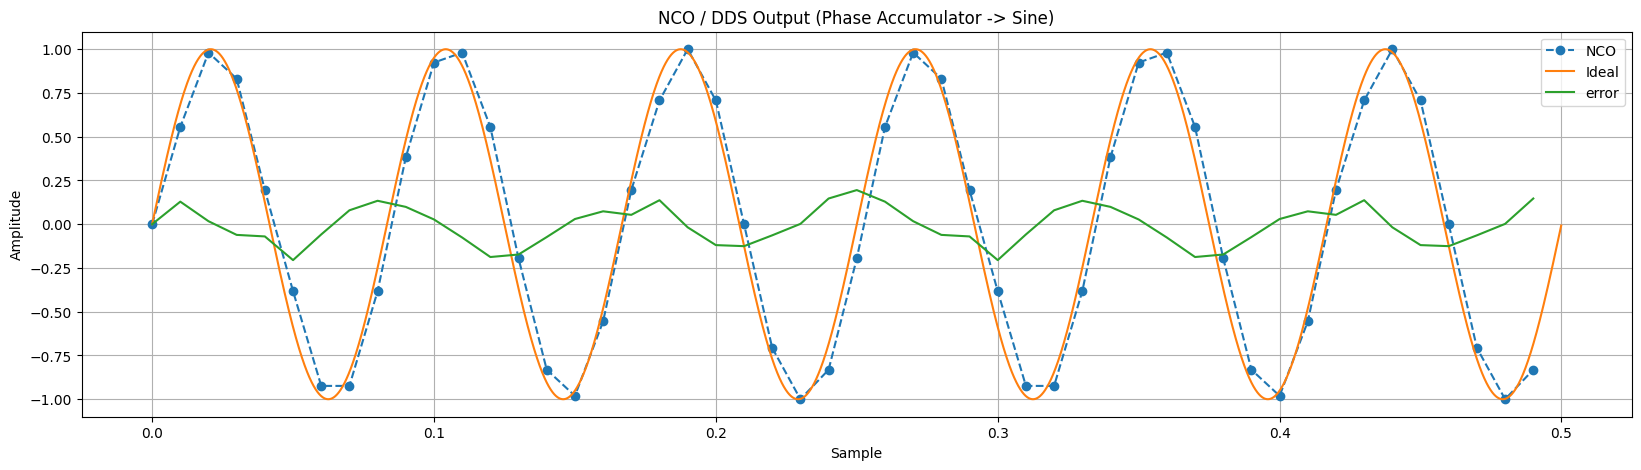

In [6]:
complex_NCO.plot()

In [7]:
# LCLS-II DAC example with a mistake that I made
H = 20
L = 12
num = 203
den = 264

modulo = 2**L % den
reminder = 2**H * num % den
error = reminder / den
psl_bad = int(((2**H * num) % den) * 2**L / den)
psl_good = int(((2**H * num) % den) * int(2**L/den))
print(modulo)
print(reminder)
print(error)
print(psl_bad)
print(psl_good)

136
104
0.3939393939393939
1613
1560


In [8]:
# A mistake that I made
H = 4
L = 2
num = 1
den = 3

modulo = 2**L % den
reminder = 2**H * num % den
error = reminder / den
psl_bad = int(((2**H * num) % den) * 2**L / den)
psl_good = int(((2**H * num) % den) * int(2**L/den))
print(modulo)
print(reminder)
print(error)
print(psl_bad)
print(psl_good)

1
1
0.3333333333333333
1
1
